In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
print("第一步 暸解資料外觀與內容")
print("\n")
#讀取資料 (是DataFrame)
train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
#用.head()了解資料的大概情況，不要用print()會比較完整而且好看
print(train.head())
#train.shape : 資料維度
print(train.shape)
print("\n")
#train.dtypes : 每一筆資料的儲存狀態(是integer, float, object等等)
print(train.dtypes)
print("\n")

print("# train.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值")
print(train.isnull().sum())

第一步 暸解資料外觀與內容


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

## Feature 1 : PassengerId (捨棄)

## Feature 2 : Survived       (欲預測變數)

## Feature 3 : Pclass

In [28]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

import matplotlib.pyplot as plt

 

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


## Feature 4 : Name

                                                Name  Survived
0                                Abbing, Mr. Anthony         0
1                        Abbott, Mr. Rossmore Edward         0
2                   Abbott, Mrs. Stanton (Rosa Hunt)         1
3                                Abelson, Mr. Samuel         0
4              Abelson, Mrs. Samuel (Hannah Wizosky)         1
5                     Adahl, Mr. Mauritz Nils Martin         0
6                                    Adams, Mr. John         0
7     Ahlin, Mrs. Johan (Johanna Persdotter Larsson)         0
8                         Aks, Mrs. Sam (Leah Rosen)         1
9                        Albimona, Mr. Nassef Cassem         1
10                            Alexander, Mr. William         0
11                       Alhomaki, Mr. Ilmari Rudolf         0
12                                    Ali, Mr. Ahmed         0
13                                  Ali, Mr. William         0
14                     Allen, Miss. Elisabeth Walton   

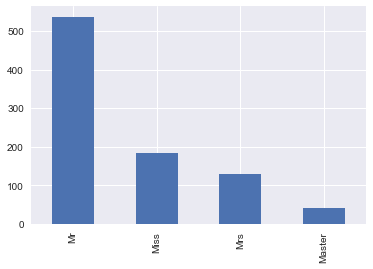

In [62]:
print (train[['Name', 'Survived']].groupby(['Name'], as_index=False).mean())


import numpy as np
import pandas as pd

#
# July 2015
# 
# This script creates a new feature: Titles, based on the name of each passenger
# The script is inpired on the work developed on this post:
# https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
#
# The difference with the code provided in the post, is that this script founds two more titles (Lady and Lord)
#
# At the end of the script we test that the number of males and females keeps the same
#

#Print you can execute arbitrary python code
train = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv", dtype={"Age": np.float64}, )

# Print out the distribution of males and females
print('Sex column values:')
print(train.Sex.value_counts())
print()

# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in train.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
train['Title'] = train['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
train['Title'] = train.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(train.Title.value_counts())

# Plot the result
train.Title.value_counts().plot(kind='bar')

## Feature 5 : Sex

      Sex  Survived
0  female  0.742038
1    male  0.188908


因為本來男生女生的乘客數量就不一樣，所以改看比例
0    0.811092
1    0.188908
Name: Survived, dtype: float64


0    0.257962
1    0.742038
Name: Survived, dtype: float64




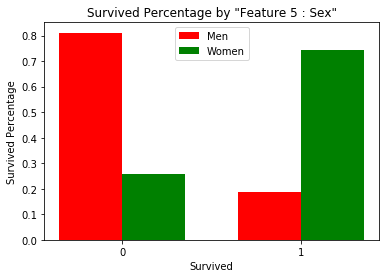

In [36]:
# 這做法是只關心該變數內各項的存活比率
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
print("\n")

# 這做法列出了所有情況
print("因為本來男生女生的乘客數量就不一樣，所以改看比例")
print(train.Survived[train.Sex == 'male'].value_counts(normalize =True))
print("\n")
print(train.Survived[train.Sex == 'female'].value_counts(normalize =True, sort = False))
print("\n")


import numpy as np
import matplotlib.pyplot as plt

def bar_plotting(lst_1, lst_2, group_1, group_2):
    N = len(lst_1)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lst_1, width, color='r')
    rects2 = ax.bar(ind + width, lst_2, width, color='g')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((0, 1))
    ax.set_xlabel("Survived")
    ax.set_ylabel('Survived Percentage')
    ax.legend((rects1[0], rects2[0]), (group_1, group_2))

male_survived = list(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
female_survived = list(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))
bar_plotting(male_survived, female_survived, 'Men', 'Women')
plt.title('Survived Percentage by "Feature 5 : Sex"')
plt.show()

## Feature 6 : Age

      Age  Survived
0    0.42  1.000000
1    0.67  1.000000
2    0.75  1.000000
3    0.83  1.000000
4    0.92  1.000000
5    1.00  0.714286
6    2.00  0.300000
7    3.00  0.833333
8    4.00  0.700000
9    5.00  1.000000
10   6.00  0.666667
11   7.00  0.333333
12   8.00  0.500000
13   9.00  0.250000
14  10.00  0.000000
15  11.00  0.250000
16  12.00  1.000000
17  13.00  1.000000
18  14.00  0.500000
19  14.50  0.000000
20  15.00  0.800000
21  16.00  0.352941
22  17.00  0.461538
23  18.00  0.346154
24  19.00  0.360000
25  20.00  0.200000
26  20.50  0.000000
27  21.00  0.208333
28  22.00  0.407407
29  23.00  0.333333
..    ...       ...
58  44.00  0.333333
59  45.00  0.416667
60  45.50  0.000000
61  46.00  0.000000
62  47.00  0.111111
63  48.00  0.666667
64  49.00  0.666667
65  50.00  0.500000
66  51.00  0.285714
67  52.00  0.500000
68  53.00  1.000000
69  54.00  0.375000
70  55.00  0.500000
71  55.50  0.000000
72  56.00  0.500000
73  57.00  0.000000
74  58.00  0.600000
75  59.00  0.000000


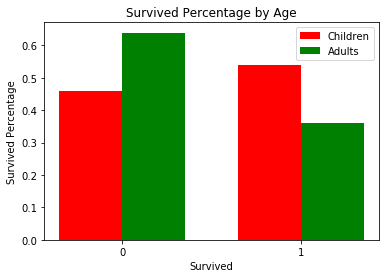

In [35]:
print (train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean())
print("\n")

child = pd.Series(np.empty(train.shape[0]))
train.Child = child
age_filter_under_18 = train.Age < 18
age_filter_above_18 = train.Age >= 18
train.Child[age_filter_under_18] = 1
train.Child[age_filter_above_18] = 0
print(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
print(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

child_survived = list(train.Survived[train.Child == 1].value_counts(normalize = True, sort = False))
adult_survived = list(train.Survived[train.Child == 0].value_counts(normalize = True, sort = False))

bar_plotting(child_survived, adult_survived, 'Children', 'Adults')
plt.title('Survived Percentage by Age')
plt.show()

## Feature 7 : SibSp

In [20]:
print (train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


## Feature 8 : Parch

In [21]:
print (train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


## Feature 9 : Ticket

In [22]:
print (train[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean())

                Ticket  Survived
0               110152  1.000000
1               110413  0.666667
2               110465  0.000000
3               110564  1.000000
4               110813  1.000000
5               111240  0.000000
6               111320  0.000000
7               111361  1.000000
8               111369  1.000000
9               111426  1.000000
10              111427  1.000000
11              111428  1.000000
12              112050  0.000000
13              112052  0.000000
14              112053  1.000000
15              112058  0.000000
16              112059  0.000000
17              112277  1.000000
18              112379  0.000000
19              113028  0.000000
20              113043  0.000000
21              113050  0.000000
22              113051  0.000000
23              113055  1.000000
24              113056  0.000000
25              113059  0.000000
26              113501  0.000000
27              113503  0.000000
28              113505  1.000000
29        

## Feature 10 : Fare

In [23]:
print (train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())

         Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
5      6.4500  0.000000
6      6.4958  0.000000
7      6.7500  0.000000
8      6.8583  0.000000
9      6.9500  0.000000
10     6.9750  0.500000
11     7.0458  0.000000
12     7.0500  0.000000
13     7.0542  0.000000
14     7.1250  0.000000
15     7.1417  1.000000
16     7.2250  0.250000
17     7.2292  0.266667
18     7.2500  0.076923
19     7.3125  0.000000
20     7.4958  0.333333
21     7.5208  0.000000
22     7.5500  0.250000
23     7.6292  0.000000
24     7.6500  0.250000
25     7.7250  0.000000
26     7.7292  0.000000
27     7.7333  0.500000
28     7.7375  0.500000
29     7.7417  0.000000
..        ...       ...
218   80.0000  1.000000
219   81.8583  1.000000
220   82.1708  0.500000
221   83.1583  1.000000
222   83.4750  0.500000
223   86.5000  1.000000
224   89.1042  1.000000
225   90.0000  0.750000
226   91.0792  1.000000
227   93.5000  1

## Feature 11 : Cabin

In [24]:
print (train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())

     Cabin  Survived
0      A10  0.000000
1      A14  0.000000
2      A16  1.000000
3      A19  0.000000
4      A20  1.000000
5      A23  1.000000
6      A24  0.000000
7      A26  1.000000
8      A31  1.000000
9      A32  0.000000
10     A34  1.000000
11     A36  0.000000
12      A5  0.000000
13      A6  1.000000
14      A7  0.000000
15    B101  1.000000
16    B102  0.000000
17     B18  1.000000
18     B19  0.000000
19     B20  1.000000
20     B22  0.500000
21     B28  1.000000
22      B3  1.000000
23     B30  0.000000
24     B35  1.000000
25     B37  0.000000
26     B38  0.000000
27     B39  1.000000
28      B4  1.000000
29     B41  1.000000
..     ...       ...
117    E12  1.000000
118   E121  1.000000
119    E17  1.000000
120    E24  1.000000
121    E25  1.000000
122    E31  0.000000
123    E33  1.000000
124    E34  1.000000
125    E36  1.000000
126    E38  0.000000
127    E40  1.000000
128    E44  0.500000
129    E46  0.000000
130    E49  1.000000
131    E50  1.000000
132    E58  0

## Feature 12 : Embarked  

In [25]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [9]:
# 變數總覽
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
fo

C:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


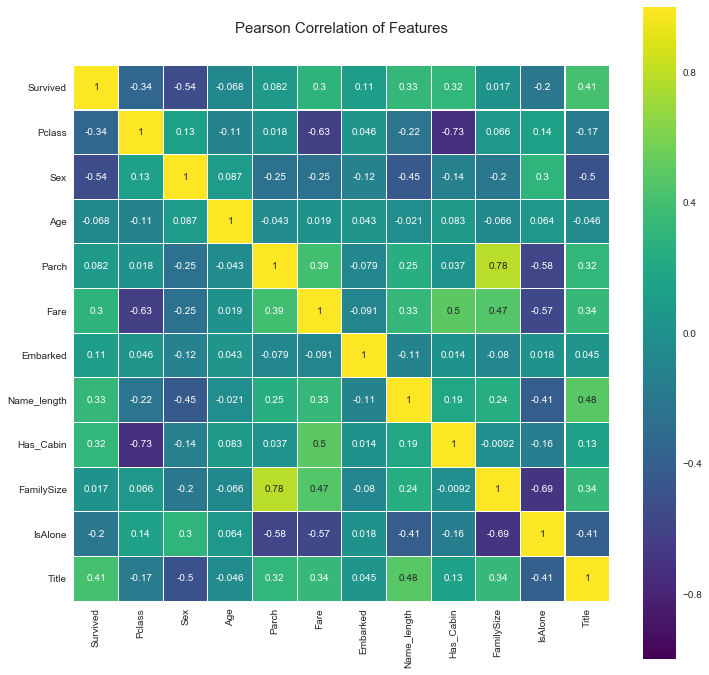

C:\Users\JS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\JS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


ModuleNotFoundError: No module named 'plotly'

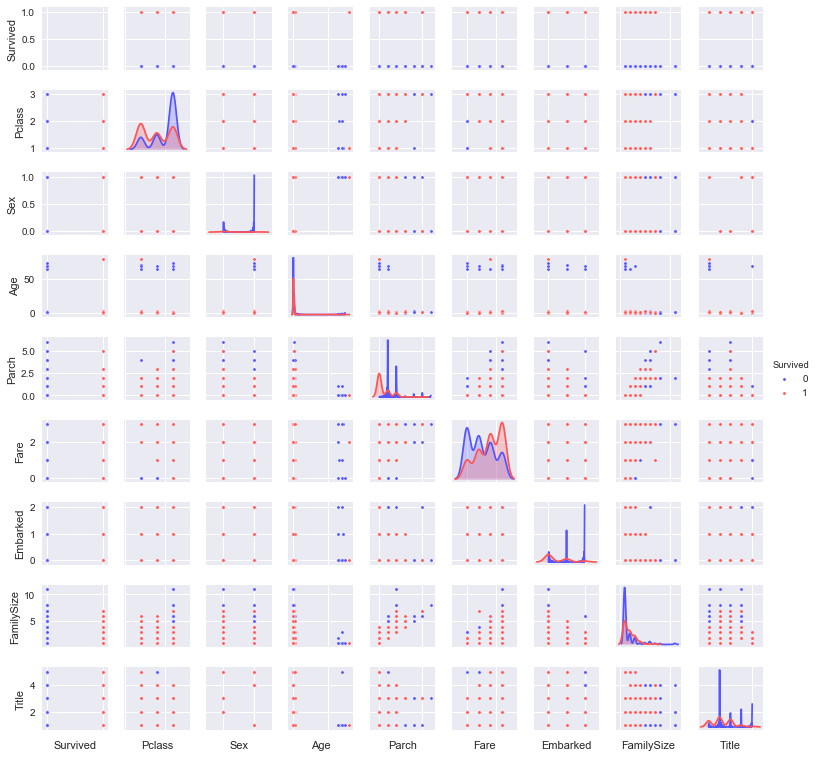

In [60]:
import numpy as np
import pandas as pd
import re
import sklearn
train_ = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv")
# test_ = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/test.csv")
print(train_.head())
PassengerId = train_['PassengerId']
print('follow is passengerid')
print(PassengerId[:5])

print (train_[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

print (train_[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

# 计算名字的长度
train_['Name_length'] = train_['Name'].apply(len)
# 将旅客是否住在头等舱二值化
train_['Has_Cabin'] = train_["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
# 发现房子的大小
train_['FamilySize'] = train_['SibSp'] + train_['Parch'] + 1
# 发现是否独居
train_['IsAlone'] = 0
train_.loc[train_['FamilySize'] == 1, 'IsAlone'] = 1
# 移除所有穿上人员的 Embarked 的NULL值
train_['Embarked'] = train_['Embarked'].fillna('S')
train_['Fare'] = train_['Fare'].fillna(train_['Fare'].median())
train_['CategoricalFare'] = pd.qcut(train_['Fare'], 4)
age_avg = train_['Age'].mean()
age_std = train_['Age'].std()
age_null_count = train_['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train_['Age'][np.isnan(train_['Age'])] = age_null_random_list
train_['Age'] = train_['Age'].astype(int)
train_['CategoricalAge'] = pd.cut(train_['Age'], 5)
# 定义函数导出旅客的Title
def get_title(name):
   title_search = re.search('([A-Za-z]+)\.',name)
   if title_search:
       return title_search.group(1)
   return ''
train_['Title'] = train_['Name'].apply(get_title)
train_['Title'] = train_['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_['Title'] = train_['Title'].replace('Mlle', 'Miss')
train_['Title'] = train_['Title'].replace('Ms', 'Miss')
train_['Title'] = train_['Title'].replace('Mme', 'Mrs')
#  映射 Sex
train_['Sex'] = train_['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# 映射 titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_['Title'] = train_['Title'].map(title_mapping)
train_['Title'] = train_['Title'].fillna(0)
# 映射 Embarked
train_['Embarked'] = train_['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# 映射 Fare
train_.loc[ train_['Fare'] <= 7.91, 'Fare'] = 0
train_.loc[(train_['Fare'] > 7.91) & (train_['Fare'] <= 14.454), 'Fare'] = 1
train_.loc[(train_['Fare'] > 14.454) & (train_['Fare'] <= 31), 'Fare']   = 2
train_.loc[ train_['Fare'] > 31, 'Fare'] = 3
train_['Fare'] = train_['Fare'].astype(int)
# 映射 Age
train_.loc[ train_['Age'] <= 16, 'Age'] = 0
train_.loc[(train_['Age'] > 16) & (train_['Age'] <= 32), 'Age'] = 1
train_.loc[(train_['Age'] > 32) & (train_['Age'] <= 48), 'Age'] = 2
train_.loc[(train_['Age'] > 48) & (train_['Age'] <= 64), 'Age'] = 3
train_.loc[train_['Age'] > 64, 'Age']

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']

train_ = train_.drop(drop_elements, axis = 1)

train_ = train_.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

# test_  = test_.drop(drop_elements, axis = 1)





# 可视化特征之间的关联

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

colormap = plt.cm.viridis

plt.figure(figsize=(12,12))

plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(train_.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()



#1.图中可以告诉我们特征之间没有太多的强关联
#这对我们的模型来说是一个好消息，因为这意味着训练数据中没有太多的冗余信息，我们每一个特征都可以提供一个独立的信息
#2.两个关联最强的特征是Family size and Parch


#最后让我们生成一个 pairplots图来观察每个特征与其它特征之间的关系
g = sns.pairplot(train_[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',

      u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )

g.set(xticklabels=[])










#用模型来选择特征的重要性

#这里使用随机森林来得到每个特征的重要程度

import numpy as np
import pandas as pd
import re
import sklearn
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

# 使用面向对象的编程方式（OOP），用python类来帮助我们生成多个实例,方便后面多个模型的构建与训练

# 下面创建SkleanHelper类它允许我们扩展内建的方法

ntrain = train_.shape[0]

SEED = 0 # 用于后面多个实例seed参数的重置

NFOLDS = 5 # set folds for out-of-fold prediction

kf = KFold(ntrain,n_folds=NFOLDS,random_state=SEED)

class SklearnHelper(object):

   def __init__(self,clf,seed=0,params=None):

       params['random_state'] = seed

       self.clf = clf(**params)

   def train(self, x_train, y_train):

       return self.clf.fit(x_train, y_train)

   def predict(self, x):

       return self.clf.predict(x)



def fit(self,x,y):

    return self.clf.fit(x,y)



def feature_importances(self,x,y):

    return self.clf.fit(x,y).feature_importances_

print(feature_importances(self,x,y))

In [3]:
print("第二步  資料預處理 (Feature Engineering)")
print("\n")
# 1. X 不要納入編號（PassengerId, Ticket）、姓名（Name）與遺漏值過多的變數（Cabin）

# 2. 填補遺漏值 : Embarked, Age
# Embarked 的遺漏值都以 "S" 填補
print(train.Embarked.value_counts())
most_embarked = train.Embarked.value_counts().index[0]
train.Embarked = train.Embarked.fillna(most_embarked)
print("經過剛剛填補遺漏值之後，Embarked遺漏值還有 %s 個" % (sum(train.Embarked.isnull())))
print("\n")
# Age 的遺漏值以中位數填補
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)
print("經過剛剛填補遺漏值之後，Age遺漏值還有 %s 個" % sum(train.Age.isnull()))

# 3. 類別標籤編碼轉換（使用 One-hot encoding） : Sex, Embarked
# 使用 one-hot encoding 進行類別標籤編碼轉換
train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ["Sex", "Embarked"]])
# 透過.values先換成ndarray。為什麼要轉換過來呢?因為等等要資料水平合併、透過ndarray跑計算阿
train_sex_embarked_ohe = train_sex_embarked_dummies.values.astype(float)

print("\n3. train_sex_embarked_dummies前5列 : \n%s" % train_sex_embarked_dummies.head())
#            Sex_female    Sex_male    Embarked_C    Embarked_Q    Embarked_S
#    0          0             1            0             0             1
#    1          1             0            1             0             0
#    2          1             0            0             0             1
#    3          1             0            0             0             1
#    4          0             1            0             0             1



# 4.   變數新增
# 4-1. 將 SibSp 與 Parch 相加再加 1（自己）成為 family_size
train_copied = train.copy()
train_copied["family_size"] = train_copied["SibSp"] + train_copied["Parch"] + 1
# 4-Final. 合併新增且整理過變數的DataFrame
train_copied =  pd.concat([train_copied, train_sex_embarked_dummies], axis = 1)
print("\n4-Final. train_copied : \n%s" % train_copied.head(3))

# 5. 整理 features, target，用.values把Dataframe轉成ndarray，因為等等要跑計算
train_features_X = (train_copied.loc[:, ["Pclass", "Age", "family_size", "Fare", "Sex_female", "Sex_male", "Embarked_C",  "Embarked_Q", "Embarked_S"]].values)
train_target_Y = train.Survived.values
print("\ntrain_features_X : \n%s" % train_features_X[ 0 , :])

第二步  資料預處理 (Feature Engineering)


S    644
C    168
Q     77
Name: Embarked, dtype: int64
經過剛剛填補遺漏值之後，Embarked遺漏值還有 0 個


經過剛剛填補遺漏值之後，Age遺漏值還有 0 個

3. train_sex_embarked_dummies前5列 : 
   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0         1           0           0           1
1           1         0           1           0           0
2           1         0           0           0           1
3           1         0           0           0           1
4           0         1           0           0           1

4-Final. train_copied : 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina 

第三步  分類器


Optimal number of features : 4
RFECV判斷過後，選 4 個 變數 讓模型表現最好


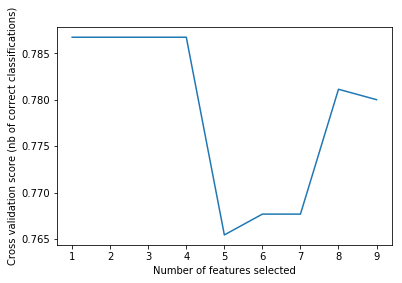

feature_importances_ : 
[ 0.11590419  0.18118106  0.08265722  0.20795824  0.22964418  0.14933806
  0.01204662  0.00759873  0.0136717 ]
 
Features sorted by their score:
(0.22964418219999999, 'Sex_female')
(0.2079582438, 'Fare')
(0.18118106179999999, 'Age')
(0.14933805950000001, 'Sex_male')
(0.1159041941, 'Pclass')
(0.0826572151, 'family_size')
(0.013671697, 'Embarked_S')
(0.0120466189, 'Embarked_C')
(0.0075987277000000002, 'Embarked_Q')


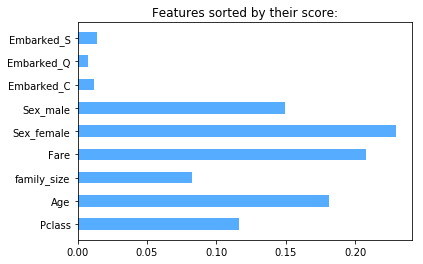



accuracy = 0.912458 


In [4]:
print("第三步  分類器")
print("\n")

from sklearn.ensemble import RandomForestClassifier  #這次分類器不是分類樹，而是隨機森林

# 建立模型
forest_clf = RandomForestClassifier(max_depth = 9, min_samples_split = 5, n_estimators = 100, random_state = 87)
forest_clf.fit(train_features_X, train_target_Y)  # train_features, target : 都是ndarray
             
      # 設定 分類器:隨機森林 的參數 ：  max_depth                  (max_depth第一次採用預設，預設值是大到把你資料分類分乾淨為止)
                                     #min_samples_split          (至少幾個觀測值以上，才能做門檻切分) 
                                     #調 max_depth,  min_samples_split -->都是為了不要過度配適 over fitting  
# 評估模型

# 0. 到底要選幾個變數才好
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(train_features_X, train_target_Y)
print("Optimal number of features : %d" % rfecv.n_features_)
print("RFECV判斷過後，選 %s 個 變數 讓模型表現最好" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



# 1. feature_importances_
print("feature_importances_ : \n%s\n " % (forest_clf.feature_importances_))

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load the dataset
names = train_copied.loc[:, ["Pclass", "Age", "family_size", "Fare", "Sex_female", "Sex_male", "Embarked_C",  "Embarked_Q", "Embarked_S"]]
rfecv.fit(train_features_X, train_target_Y)
print("Features sorted by their score:")

a = sorted(zip(map(lambda x: round(x, 10), forest_clf.feature_importances_), names), reverse=True)
ind = np.arange(0, len(list(a)), 1)
for i in ind :
    print(a[i])

# bar plot the  feature_importances_
import numpy as np
import matplotlib.pyplot as plt


width = 0.5
plt.barh(ind, forest_clf.feature_importances_, width, facecolor = "dodgerblue", align='center', alpha = 0.75)
plt.title("Features sorted by their score:")
plt.yticks(ind, ["Pclass", "Age", "family_size", "Fare", "Sex_female", "Sex_male", "Embarked_C",  "Embarked_Q", "Embarked_S"])
ax = plt.gca()
plt.show()    

print("\n")

# 2. accuracy
print("accuracy = %f " % (forest_clf.score(train_features_X, train_target_Y)))




在第三步各變數重要性評估後， 回第二步做Feature Engineering
Sex column values:
Sex column values:
male      577
female    314
Name: Sex, dtype: int64

Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']

Title column values. Males and females are the same that for the "Sex" column:
Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64


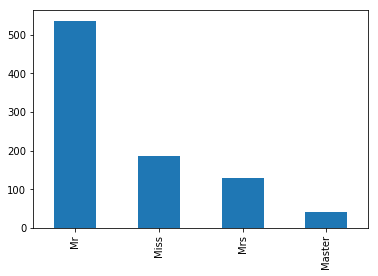

In [13]:
print("在第三步各變數重要性評估後， 回第二步做Feature Engineering")

print('Sex column values:')
print(train.Sex.value_counts())
print()



# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in train.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
train['Title'] = train['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
train['Title'] = train.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(train.Title.value_counts())

# Plot the result
train.Title.value_counts().plot(kind='bar')
plt.show()





In [5]:
print("第四步  預測、模型評估")
print("\n")

#對於test data也要做和train data一樣的事情 : 
#先讀取test data, 了解外觀

# 載入預測資料
test_url = "https://storage.googleapis.com/py_ml_datasets/test.csv"
test = pd.read_csv(test_url)
print(test.head())
#了解test data的大概樣貌
print(test.shape)
print("\n")
print(test.dtypes)
print("\n")
#看test data有沒有遺漏值
print("看test data有沒有遺漏值 : \n%s " % (test.isnull().sum()))
print("\n")
#有的話就來填補遺漏值
# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)
print("填補過後，Age的遺漏值還有%s個" % (sum(test.Age.isnull())))
# Fare 的遺漏值以中位數填補
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)
print("填補過後，Fare的遺漏值還有%s個" % (sum(test.Fare.isnull())))
# 使用 one-hot encoding 進行類別標籤編碼轉換
test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]])
test_sex_embarked_ohe = test_sex_embarked_dummies.values.astype(float)
print("使用 one-hot encoding 進行類別標籤Sex, Embarked編碼轉換 \n" )
print(test_sex_embarked_dummies.head())
# 整理 test_features
test_copied = test.copy()
test_copied['family_size'] = test_copied['SibSp'] + test_copied['Parch'] + 1
test_features = np.hstack((test_copied.loc[:, ["Pclass", "Age", "family_size", "Fare"]].values, test_sex_embarked_ohe))

第四步  預測、模型評估


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
(418, 11)


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch       

In [6]:
print("第五步  應用預測資料")
print("\n")

# 預估
predictions = forest_clf.predict(test_features)
print(predictions)

第五步  應用預測資料


[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [7]:
print("第六步 上傳")
print("\n")

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
print(my_solution.head())
print(my_solution.shape)
my_solution.to_csv("my_ninth_solution.csv", index_label = ["PassengerId"])

第六步 上傳


     Survived
892         0
893         0
894         0
895         0
896         1
(418, 1)


http://blog.csdn.net/login_sonata/article/details/54315273


特征选择
 feature_importance = rfc.feature_importances_
 feature_importance = 100.0 * (feature_importance / feature_importance.max())
 print(feature_importance)
交叉验证
 cvscores = cross_validation.cross_val_score(rfc, feature, target, cv=5)
 print(cvscores.mean())

7，sklearn这个包非常方便（不管是预处理还是训练），特征选择和交叉验证什么的功能都有，下面这个是非常有用的GridSearch参数调优方法，虽然这次没有用到：

对效果最好的分类算法使用GridSearch做参数调优（来自网络，仅供参考）：

def get_best_parameter():
    x_train, y_train = train_data.get_process_train_data() #得到训练特征和标签
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
    param_grid = [{'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 5, 10, None]}]
    gs = GridSearchCV(estimator=tree,param_grid=param_grid,scoring='accuracy')
    gs = gs.fit(x_train, y_train)
    print(gs.best_score_)
    print(gs.best_params_)
    bestMod = grid.best_estimator_ #返回最优模型